/home/yjcha/ipykernel_217653/2984474529.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: Philadelphia_scores_by_category_colored.png


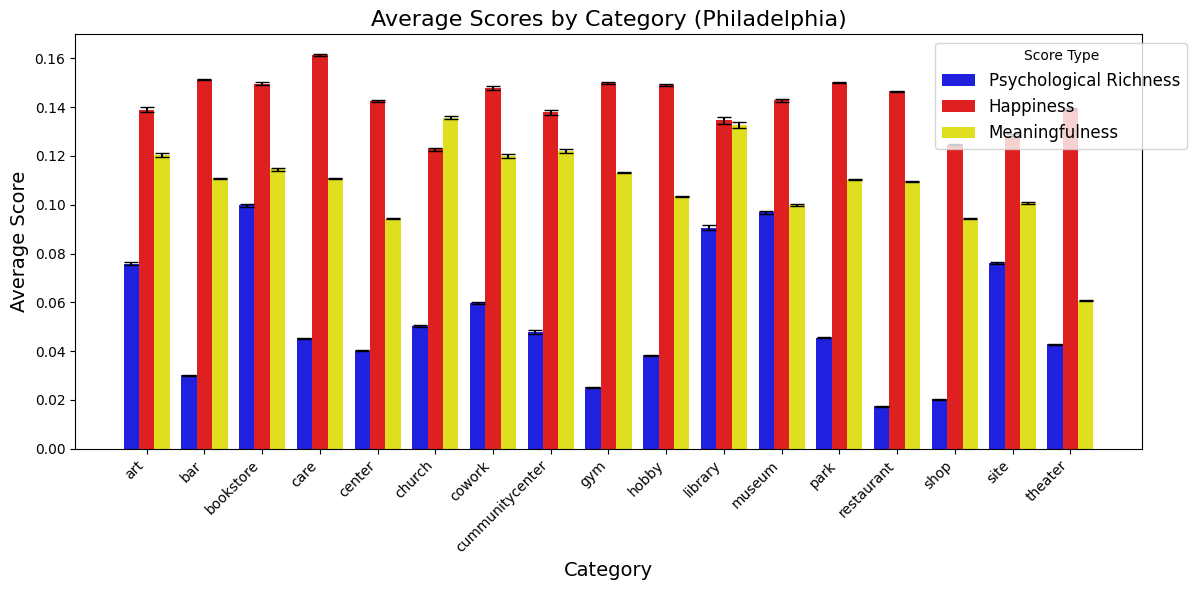

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Philadelphia data
philadelphia_file = "Philadelphia_compiled.csv"
data = pd.read_csv(philadelphia_file)

# Ensure relevant columns exist
required_columns = ['Category', 'Psychological_Richness_Score_Centroid', 
                    'Happiness_Score_Centroid', 'Meaningfulness_Score_Centroid']

if not all(col in data.columns for col in required_columns):
    raise ValueError("One or more required columns are missing in the data.")

# Group data by 'Category' and calculate mean and standard error
grouped_data = data.groupby('Category').agg(
    Richness_Mean=('Psychological_Richness_Score_Centroid', 'mean'),
    Richness_SE=('Psychological_Richness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5)),
    Happiness_Mean=('Happiness_Score_Centroid', 'mean'),
    Happiness_SE=('Happiness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5)),
    Meaningfulness_Mean=('Meaningfulness_Score_Centroid', 'mean'),
    Meaningfulness_SE=('Meaningfulness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5))
).reset_index()

# Melt the data for easier plotting
melted_data = grouped_data.melt(
    id_vars='Category',
    value_vars=['Richness_Mean', 'Happiness_Mean', 'Meaningfulness_Mean'],
    var_name='Score_Type',
    value_name='Mean'
)

# Add standard error for error bars
melted_data['SE'] = grouped_data.melt(
    id_vars='Category',
    value_vars=['Richness_SE', 'Happiness_SE', 'Meaningfulness_SE'],
    var_name='Score_Type',
    value_name='SE'
)['SE']

# Map score types to simpler labels
score_label_map = {
    'Richness_Mean': 'Psychological Richness',
    'Happiness_Mean': 'Happiness',
    'Meaningfulness_Mean': 'Meaningfulness'
}
melted_data['Score_Type'] = melted_data['Score_Type'].map(score_label_map)

# Define custom colors for bar plot
custom_palette = {
    'Psychological Richness': 'blue',
    'Happiness': 'red',
    'Meaningfulness': 'yellow'
}

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=melted_data, 
    x='Category', 
    y='Mean', 
    hue='Score_Type', 
    ci=None, 
    palette=custom_palette
)

# Add error bars (ensure they align with each bar)
for container, score_type in zip(barplot.containers, melted_data['Score_Type'].unique()):
    for bar, (_, row) in zip(container, melted_data[melted_data['Score_Type'] == score_type].iterrows()):
        bar_x = bar.get_x() + bar.get_width() / 2  # Center of each bar
        plt.errorbar(
            x=bar_x, 
            y=row['Mean'], 
            yerr=row['SE'], 
            fmt='none', 
            color='black', 
            capsize=5
        )

# Customize plot
plt.title('Average Scores by Category (Philadelphia)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Score', fontsize=14)

# Adjust x-axis tick labels
plt.xticks(rotation=45, ha='right')  # Right-align labels for better readability

# Move legend to the right corner outside the plot
plt.legend(title='Score Type', fontsize=12, loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# Save plot as high-resolution PNG
output_file = "Philadelphia_scores_by_category_colored.png"
plt.savefig(output_file, dpi=300)
print(f"Graph saved as: {output_file}")

# Show plot
plt.show()


In [6]:
print(data.columns)


Index(['name', 'lat', 'lon', 'date', 'score', 'City', 'Category',
       'Happiness_Score_Centroid', 'Psychological_Richness_Score_Centroid',
       'Meaningfulness_Score_Centroid', 'Original_Row_Number'],
      dtype='object')


/home/yjcha/ipykernel_217653/3369649857.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: Philadelphia_scores_by_category.png


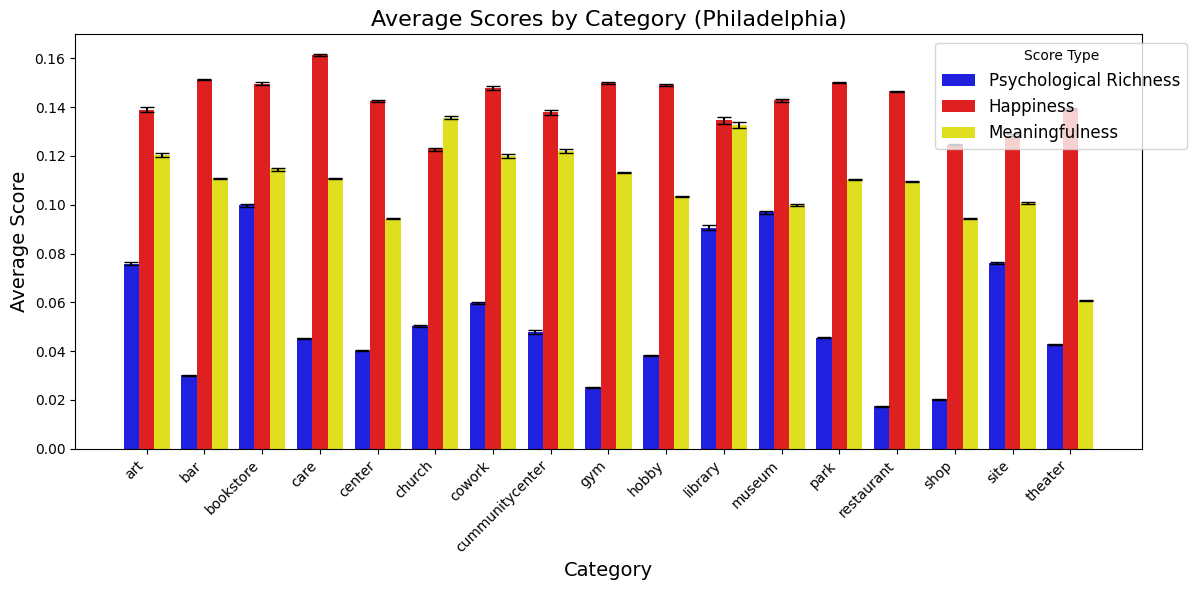

/home/yjcha/ipykernel_217653/3369649857.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: NYC_scores_by_category.png


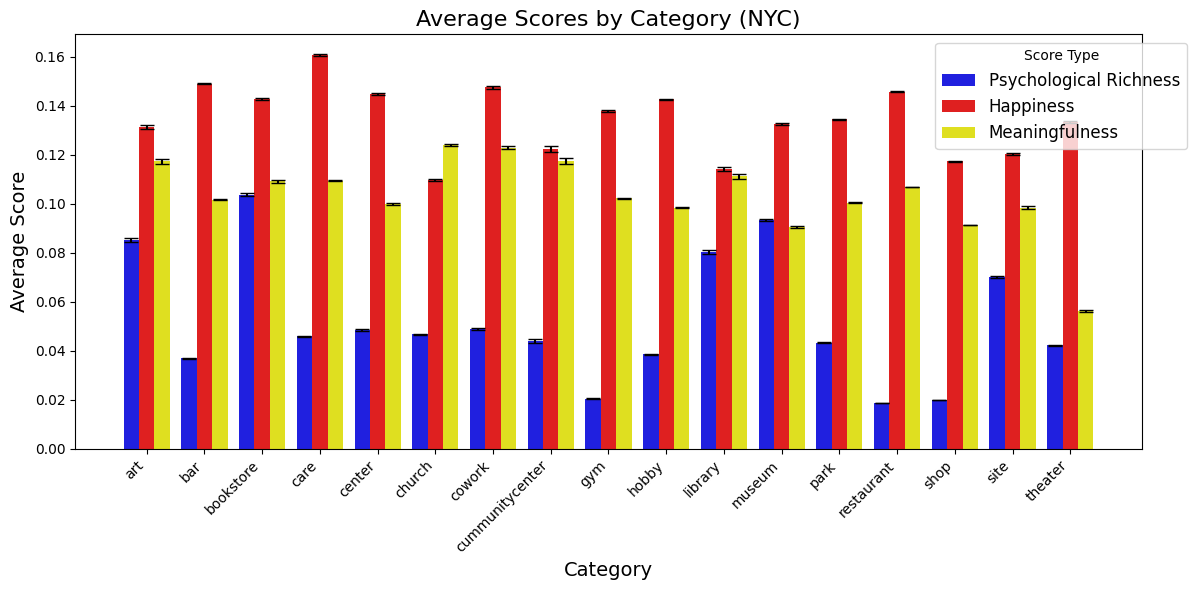

/home/yjcha/ipykernel_217653/3369649857.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: Milwaukee_scores_by_category.png


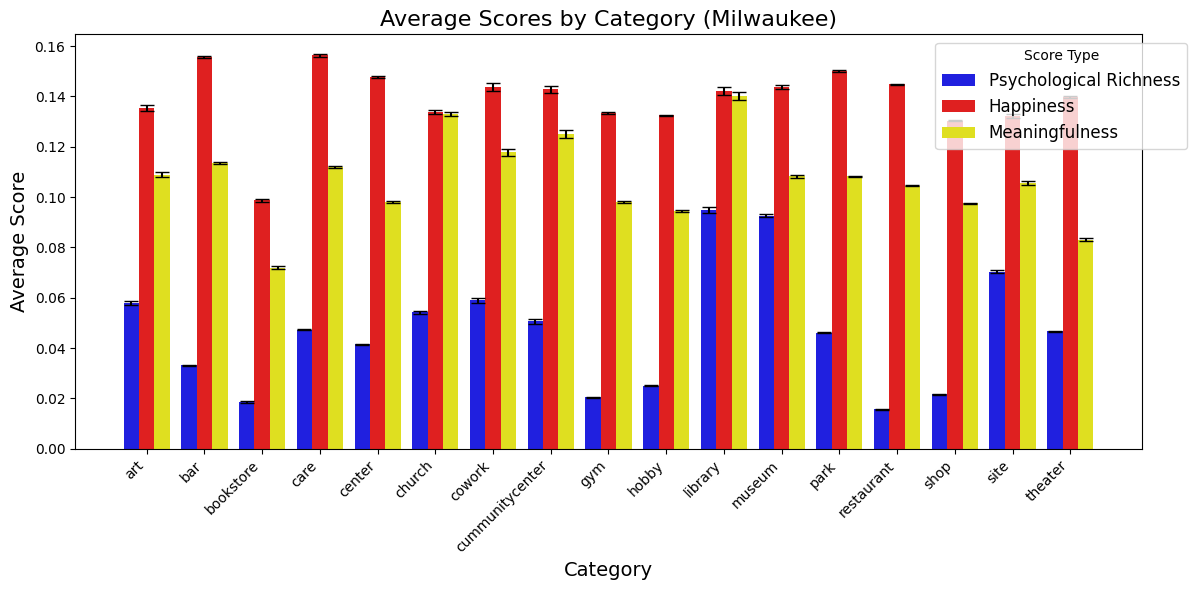

/home/yjcha/ipykernel_217653/3369649857.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: Los Angeles_scores_by_category.png


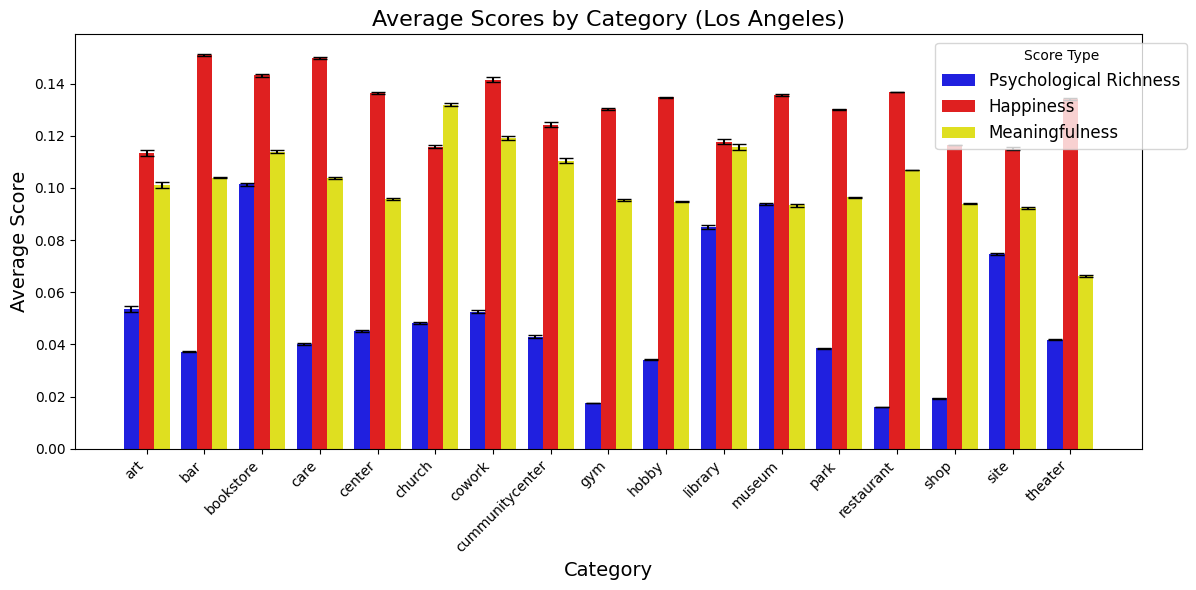

/home/yjcha/ipykernel_217653/3369649857.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: Dallas_scores_by_category.png


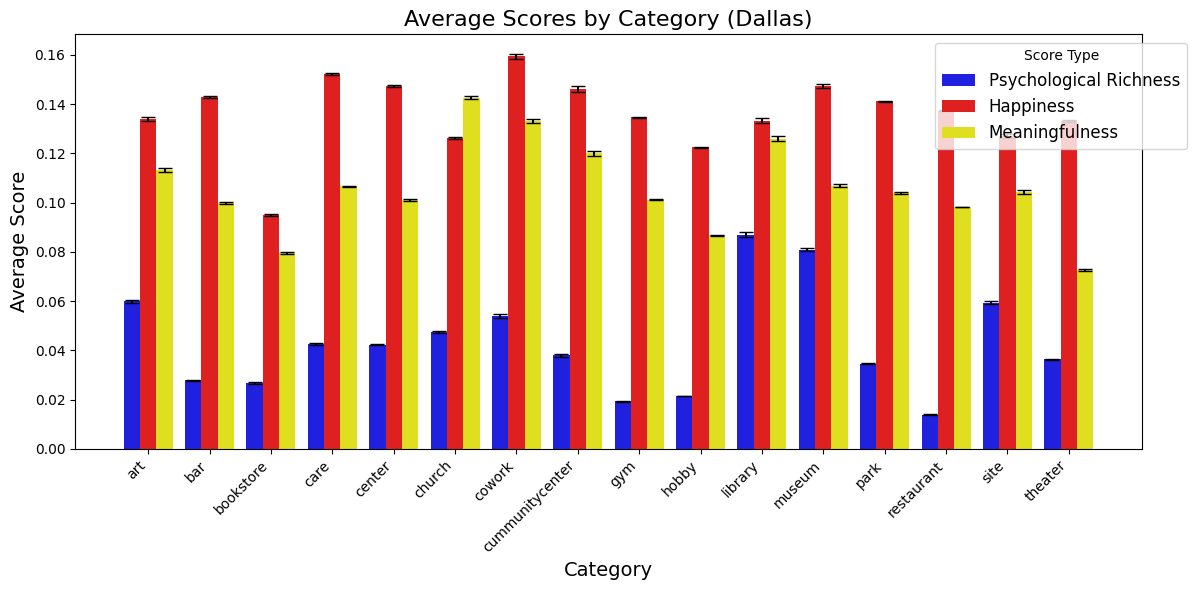

/home/yjcha/ipykernel_217653/3369649857.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: Cleveland_scores_by_category.png


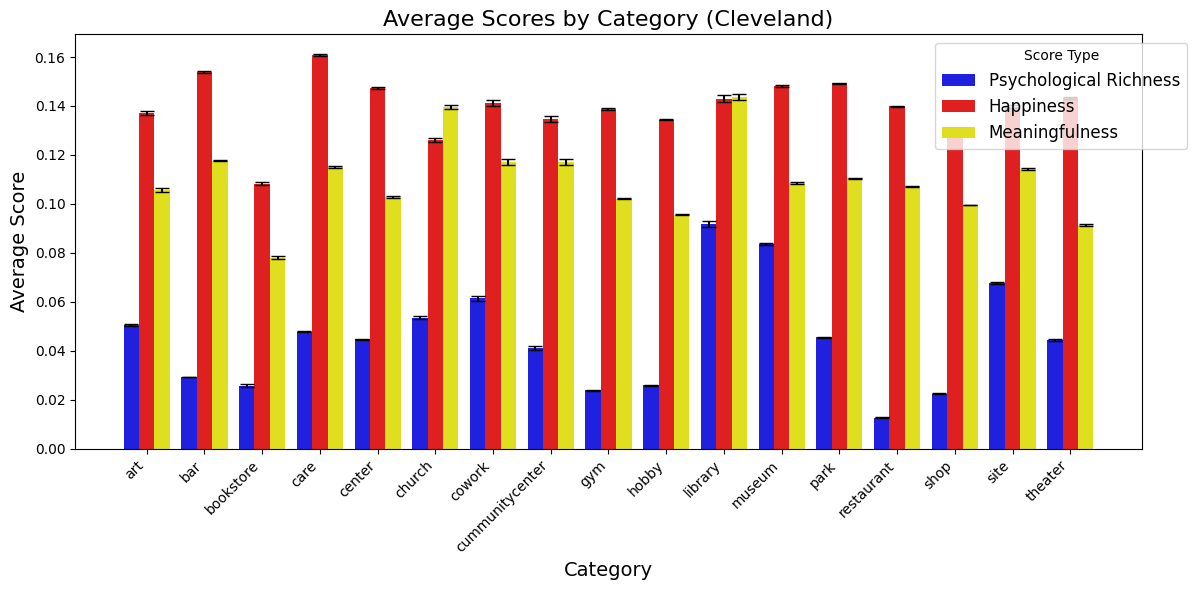

/home/yjcha/ipykernel_217653/3369649857.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: Chicago_scores_by_category.png


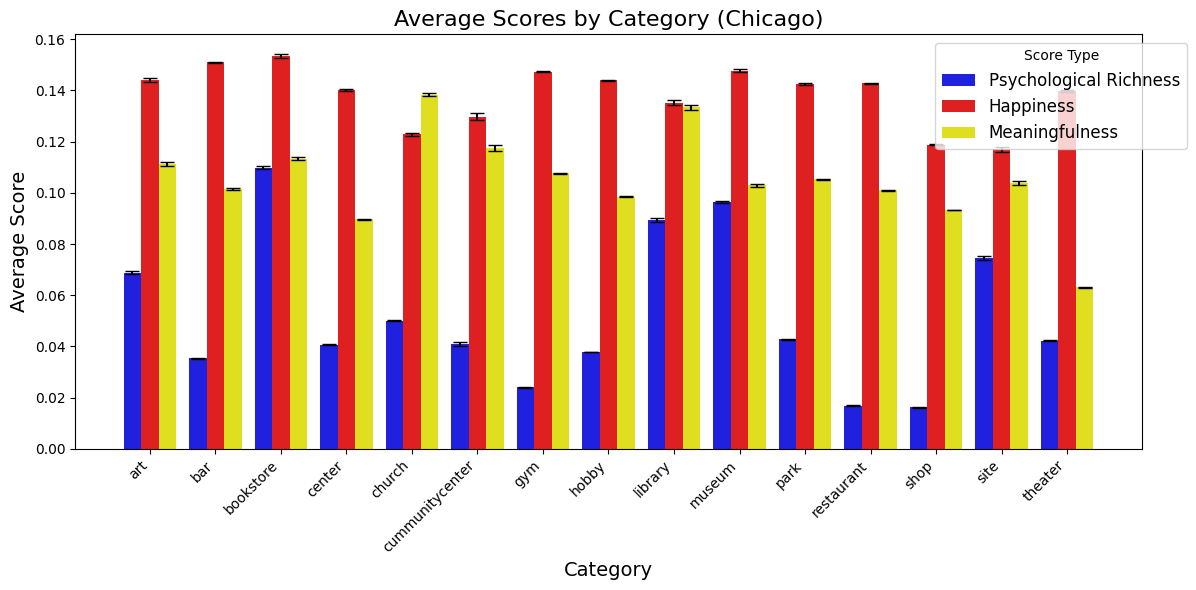

/home/yjcha/ipykernel_217653/3369649857.py:77: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: Arlington_scores_by_category.png


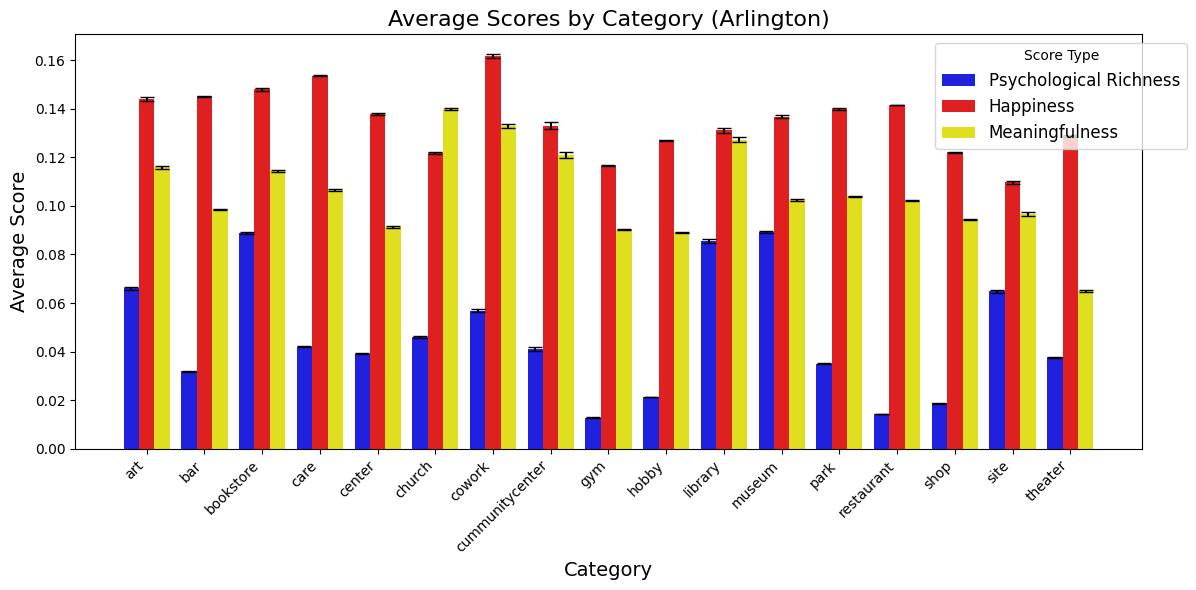

All plots generated.


In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# List of city files (excluding Houston)
city_files = [
    "Philadelphia_compiled.csv",
    "NYC_compiled.csv",
    "Milwaukee_compiled.csv",
    "Los Angeles_compiled.csv",
    "Dallas_compiled.csv",
    "Cleveland_compiled.csv",
    "Chicago_compiled.csv",
    "Chicago_compiled.csv",
    "Arlington_compiled.csv"
]

# Define function for generating plots
def generate_plot(city_file):
    # Load city data
    data = pd.read_csv(city_file)

    # Ensure relevant columns exist
    required_columns = ['Category', 'Psychological_Richness_Score_Centroid', 
                        'Happiness_Score_Centroid', 'Meaningfulness_Score_Centroid']

    if not all(col in data.columns for col in required_columns):
        print(f"Skipping {city_file}: Missing required columns.")
        return

    # Extract city name from the file
    city_name = city_file.replace("_compiled.csv", "").replace("_", " ")

    # Group data by 'Category' and calculate mean and standard error
    grouped_data = data.groupby('Category').agg(
        Richness_Mean=('Psychological_Richness_Score_Centroid', 'mean'),
        Richness_SE=('Psychological_Richness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5)),
        Happiness_Mean=('Happiness_Score_Centroid', 'mean'),
        Happiness_SE=('Happiness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5)),
        Meaningfulness_Mean=('Meaningfulness_Score_Centroid', 'mean'),
        Meaningfulness_SE=('Meaningfulness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5))
    ).reset_index()

    # Melt the data for easier plotting
    melted_data = grouped_data.melt(
        id_vars='Category',
        value_vars=['Richness_Mean', 'Happiness_Mean', 'Meaningfulness_Mean'],
        var_name='Score_Type',
        value_name='Mean'
    )

    # Add standard error for error bars
    melted_data['SE'] = grouped_data.melt(
        id_vars='Category',
        value_vars=['Richness_SE', 'Happiness_SE', 'Meaningfulness_SE'],
        var_name='Score_Type',
        value_name='SE'
    )['SE']

    # Map score types to simpler labels
    score_label_map = {
        'Richness_Mean': 'Psychological Richness',
        'Happiness_Mean': 'Happiness',
        'Meaningfulness_Mean': 'Meaningfulness'
    }
    melted_data['Score_Type'] = melted_data['Score_Type'].map(score_label_map)

    # Define custom colors for bar plot
    custom_palette = {
        'Psychological Richness': 'blue',
        'Happiness': 'red',
        'Meaningfulness': 'yellow'
    }

    # Plotting
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(
        data=melted_data, 
        x='Category', 
        y='Mean', 
        hue='Score_Type', 
        ci=None, 
        palette=custom_palette
    )

    # Add error bars (ensure they align with each bar)
    for container, score_type in zip(barplot.containers, melted_data['Score_Type'].unique()):
        for bar, (_, row) in zip(container, melted_data[melted_data['Score_Type'] == score_type].iterrows()):
            bar_x = bar.get_x() + bar.get_width() / 2  # Center of each bar
            plt.errorbar(
                x=bar_x, 
                y=row['Mean'], 
                yerr=row['SE'], 
                fmt='none', 
                color='black', 
                capsize=5
            )

    # Customize plot
    plt.title(f'Average Scores by Category ({city_name})', fontsize=16)
    plt.xlabel('Category', fontsize=14)
    plt.ylabel('Average Score', fontsize=14)

    # Adjust x-axis tick labels
    plt.xticks(rotation=45, ha='right')  # Right-align labels for better readability

    # Move legend to the right corner outside the plot
    plt.legend(title='Score Type', fontsize=12, loc='upper right', bbox_to_anchor=(1.05, 1))
    plt.tight_layout()

    # Save plot as high-resolution PNG
    output_file = f"{city_name}_scores_by_category.png"
    plt.savefig(output_file, dpi=300)
    print(f"Graph saved as: {output_file}")

    # Show plot
    plt.show()

# Loop through all city files and generate plots
for city_file in city_files:
    generate_plot(city_file)

print("All plots generated.")


In [12]:
import pandas as pd

# Load Houston file and print column names
houston_file = "Houston_compiled.csv"

try:
    # Load the Houston CSV file
    data = pd.read_csv(houston_file)
    
    # Print column names
    print(f"Column names in {houston_file}:")
    print(data.columns.tolist())
except FileNotFoundError:
    print(f"File not found: {houston_file}")
except Exception as e:
    print(f"An error occurred: {e}")


Column names in Houston_compiled.csv:
['name', 'lat', 'lon', 'text', 'date', 'score', 'review_id', 'Happiness_Score_Centroid', 'Psychological_Richness_Score_Centroid', 'Meaningfulness_Score_Centroid', 'FileName']


/home/yjcha/ipykernel_217653/1151698762.py:65: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: Houston_scores_by_category.png


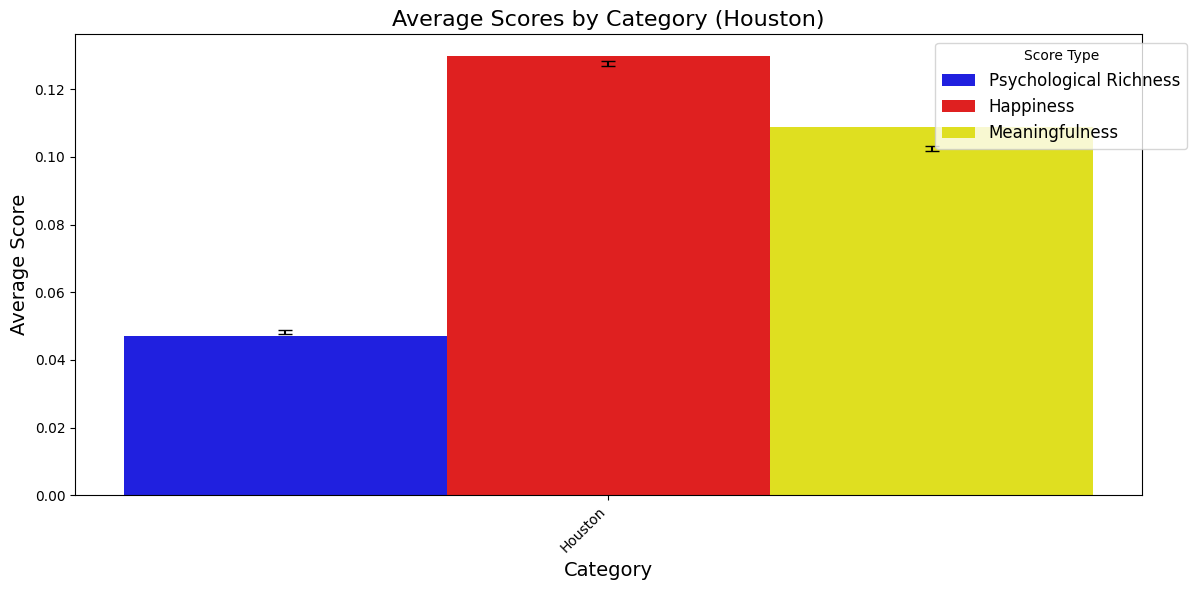

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Houston data
houston_file = "Houston_compiled.csv"
data = pd.read_csv(houston_file)

# Ensure the required columns exist
required_columns = ['FileName', 'Psychological_Richness_Score_Centroid', 
                    'Happiness_Score_Centroid', 'Meaningfulness_Score_Centroid']

if not all(col in data.columns for col in required_columns):
    raise ValueError("One or more required columns are missing in the data.")

# Create the 'Category' column by transforming 'FileName'
data['Category'] = data['FileName'].apply(lambda x: x.split('_')[0].replace('.csv', ''))

# Group data by 'FileName' and calculate mean and standard error
grouped_data = data.groupby('FileName').agg(
    Richness_Mean=('Psychological_Richness_Score_Centroid', 'mean'),
    Richness_SE=('Psychological_Richness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5)),
    Happiness_Mean=('Happiness_Score_Centroid', 'mean'),
    Happiness_SE=('Happiness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5)),
    Meaningfulness_Mean=('Meaningfulness_Score_Centroid', 'mean'),
    Meaningfulness_SE=('Meaningfulness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5))
).reset_index()

# Add a 'Category' column to the grouped data for plotting
grouped_data['Category'] = grouped_data['FileName'].apply(lambda x: x.split('_')[0].replace('.csv', ''))

# Melt the data for easier plotting
melted_data = grouped_data.melt(
    id_vars='Category',
    value_vars=['Richness_Mean', 'Happiness_Mean', 'Meaningfulness_Mean'],
    var_name='Score_Type',
    value_name='Mean'
)

# Add standard error for error bars
melted_data['SE'] = grouped_data.melt(
    id_vars='Category',
    value_vars=['Richness_SE', 'Happiness_SE', 'Meaningfulness_SE'],
    var_name='Score_Type',
    value_name='SE'
)['SE']

# Map score types to simpler labels
score_label_map = {
    'Richness_Mean': 'Psychological Richness',
    'Happiness_Mean': 'Happiness',
    'Meaningfulness_Mean': 'Meaningfulness'
}
melted_data['Score_Type'] = melted_data['Score_Type'].map(score_label_map)

# Define custom colors for bar plot
custom_palette = {
    'Psychological Richness': 'blue',
    'Happiness': 'red',
    'Meaningfulness': 'yellow'
}

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=melted_data, 
    x='Category', 
    y='Mean', 
    hue='Score_Type', 
    ci=None, 
    palette=custom_palette
)

# Add error bars (ensure they align with each bar)
for container, score_type in zip(barplot.containers, melted_data['Score_Type'].unique()):
    for bar, (_, row) in zip(container, melted_data[melted_data['Score_Type'] == score_type].iterrows()):
        bar_x = bar.get_x() + bar.get_width() / 2  # Center of each bar
        plt.errorbar(
            x=bar_x, 
            y=row['Mean'], 
            yerr=row['SE'], 
            fmt='none', 
            color='black', 
            capsize=5
        )

# Customize plot
plt.title('Average Scores by Category (Houston)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Score', fontsize=14)

# Adjust x-axis tick labels
plt.xticks(rotation=45, ha='right')  # Right-align labels for better readability

# Move legend to the right corner outside the plot
plt.legend(title='Score Type', fontsize=12, loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# Save plot as high-resolution PNG
output_file = "Houston_scores_by_category.png"
plt.savefig(output_file, dpi=300)
print(f"Graph saved as: {output_file}")

# Show plot
plt.show()


In [15]:
import pandas as pd

# Load Houston data
houston_file = "Houston_compiled.csv"
data = pd.read_csv(houston_file)

# Ensure 'FileName' column exists
if 'FileName' not in data.columns:
    raise ValueError("'FileName' column is missing in the data.")

# Randomly sample 10 values from the 'FileName' column
random_filenames = data['FileName'].sample(n=10, random_state=42).tolist()

# Print the results
print("Random examples from the 'FileName' column:")
for idx, filename in enumerate(random_filenames, 1):
    print(f"{idx}. {filename}")


Random examples from the 'FileName' column:
1. Houston_park_centroid.csv
2. Houston_shop_centroid.csv
3. Houston_gym_centroid.csv
4. Houston_gym_centroid.csv
5. Houston_shop_centroid.csv
6. Houston_park_centroid.csv
7. Houston_park_centroid.csv
8. Houston_park_centroid.csv
9. Houston_shop_centroid.csv
10. Houston_gym_centroid.csv


/home/yjcha/ipykernel_217653/3964590022.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


Graph saved as: Houston_scores_by_category.png


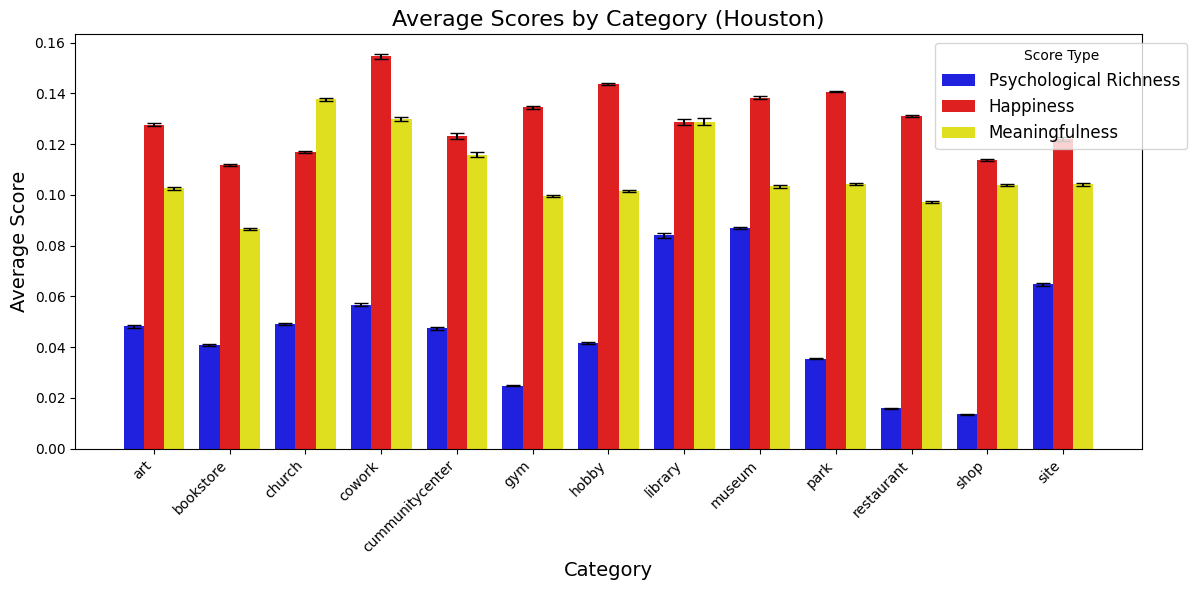

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Houston data
houston_file = "Houston_compiled.csv"
data = pd.read_csv(houston_file)

# Ensure the required columns exist
required_columns = ['FileName', 'Psychological_Richness_Score_Centroid', 
                    'Happiness_Score_Centroid', 'Meaningfulness_Score_Centroid']

if not all(col in data.columns for col in required_columns):
    raise ValueError("One or more required columns are missing in the data.")

# Extract the category name from the FileName column
data['Category'] = data['FileName'].apply(lambda x: x.split('_')[1] if len(x.split('_')) > 1 else 'Unknown')

# Group data by 'Category' and calculate mean and standard error
grouped_data = data.groupby('Category').agg(
    Richness_Mean=('Psychological_Richness_Score_Centroid', 'mean'),
    Richness_SE=('Psychological_Richness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5)),
    Happiness_Mean=('Happiness_Score_Centroid', 'mean'),
    Happiness_SE=('Happiness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5)),
    Meaningfulness_Mean=('Meaningfulness_Score_Centroid', 'mean'),
    Meaningfulness_SE=('Meaningfulness_Score_Centroid', lambda x: x.std() / (len(x) ** 0.5))
).reset_index()

# Melt the data for easier plotting
melted_data = grouped_data.melt(
    id_vars='Category',
    value_vars=['Richness_Mean', 'Happiness_Mean', 'Meaningfulness_Mean'],
    var_name='Score_Type',
    value_name='Mean'
)

# Add standard error for error bars
melted_data['SE'] = grouped_data.melt(
    id_vars='Category',
    value_vars=['Richness_SE', 'Happiness_SE', 'Meaningfulness_SE'],
    var_name='Score_Type',
    value_name='SE'
)['SE']

# Map score types to simpler labels
score_label_map = {
    'Richness_Mean': 'Psychological Richness',
    'Happiness_Mean': 'Happiness',
    'Meaningfulness_Mean': 'Meaningfulness'
}
melted_data['Score_Type'] = melted_data['Score_Type'].map(score_label_map)

# Define custom colors for bar plot
custom_palette = {
    'Psychological Richness': 'blue',
    'Happiness': 'red',
    'Meaningfulness': 'yellow'
}

# Plotting
plt.figure(figsize=(12, 6))
barplot = sns.barplot(
    data=melted_data, 
    x='Category', 
    y='Mean', 
    hue='Score_Type', 
    ci=None, 
    palette=custom_palette
)

# Add error bars (ensure they align with each bar)
for container, score_type in zip(barplot.containers, melted_data['Score_Type'].unique()):
    for bar, (_, row) in zip(container, melted_data[melted_data['Score_Type'] == score_type].iterrows()):
        bar_x = bar.get_x() + bar.get_width() / 2  # Center of each bar
        plt.errorbar(
            x=bar_x, 
            y=row['Mean'], 
            yerr=row['SE'], 
            fmt='none', 
            color='black', 
            capsize=5
        )

# Customize plot
plt.title('Average Scores by Category (Houston)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Average Score', fontsize=14)

# Adjust x-axis tick labels
plt.xticks(rotation=45, ha='right')  # Right-align labels for better readability

# Move legend to the right corner outside the plot
plt.legend(title='Score Type', fontsize=12, loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout()

# Save plot as high-resolution PNG
output_file = "Houston_scores_by_category.png"
plt.savefig(output_file, dpi=300)
print(f"Graph saved as: {output_file}")

# Show plot
plt.show()
